## Medical Cost Analysis Project

This project focuses on analyzing the medical costs billed by health insurance for individuals. An exploratory data analysis was initially conducted on the dataset. Following this, various regression models were employed to predict medical costs. In addition to manually constructed models, the automated machine learning library, PyCaret, was utilized. Finally, the results of the models were thoroughly examined and compared.

- Dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance

#### Columns

- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

**Author: Süheyl Çavuşoğlu**

## 2. Importing Required Libraries

- The libraries used throughout the project are imported below.

In [ ]:
!pip install pycaret

# If you're planning to install PyCaret on your local machine, it's highly advisable to set up a new virtual environment to work within. The dependencies of PyCaret could potentially have a negative impact on your other libraries and projects.
# By creating a dedicated virtual environment, you can keep the interactions between PyCaret's dependencies and your existing environment isolated, ensuring a smooth and trouble-free experience.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from pycaret.regression import *  # autoML

from google.colab import data_table   # exploring datasets more interactively with data_table in Google Colab
data_table.enable_dataframe_formatter()

## 3. Perform An Exploratory Data Analysis

In [3]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- The DataFrame consists of 1338 rows and 7 columns, with no missing values. It contains integer, float, and object data types. Specifically, there are 2 columns with float values, 3 columns with object values, and 2 columns with integer values.

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Age (count: 1338):
- Mean age is approximately 39.2 years.
- The standard deviation is around 14.05, indicating variability in age.
- The youngest individual is 18 years old, and the oldest is 64 years old.
- The majority of individuals fall within the range of 27 to 51 years old, as indicated by the interquartile range (25th to 75th percentiles).

BMI (count: 1338):
- Average BMI is about 30.66.
- The spread of BMI values is captured by a standard deviation of approximately 6.10.
- The BMI ranges from a minimum of 15.96 to a maximum of 53.13.
-The middle 50% of individuals have a BMI between 26.30 and 34.69.

Children (count: 1338):
- On average, individuals have approximately 1.09 children.
- The standard deviation is around 1.21, suggesting some variation in the number of children.
- The majority of individuals have 0 to 2 children, with 75% having up to 2 children.

Charges (count: 1338):
- The average medical charges amount to approximately 13270.42.
- The standard deviation is quite high at 12110.01, indicating significant variability in charges.
- Charges range from a minimum of 1121.87 to a maximum of 63770.43.
- The middle 50% of individuals have medical charges between 4740.29 and 16639.91.

- More information about the dataset can be obtained by making visualizations as follows.

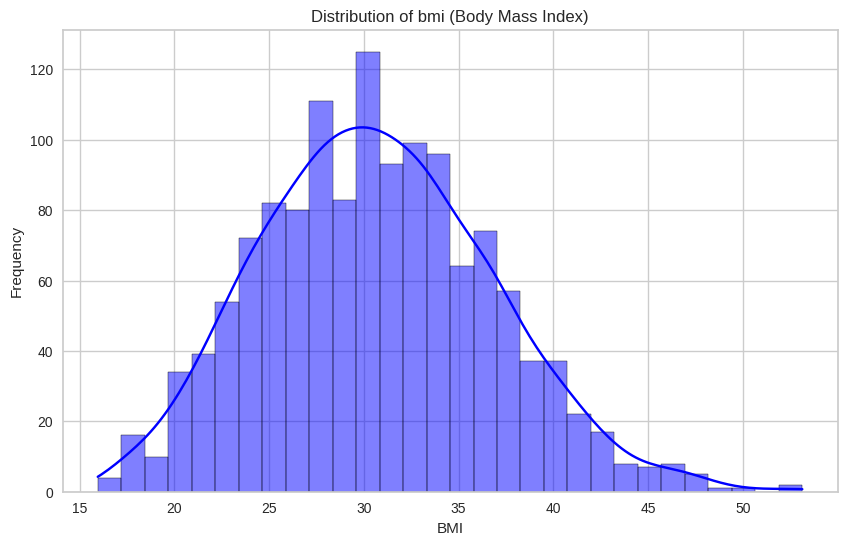

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(df['bmi'], kde=True, bins=30, color = 'blue')
plt.title('Distribution of bmi (Body Mass Index)')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

- The Body Mass Index (BMI) distribution is approximately similar to the normal (Gaussian) distribution. The highest frequency values are between 25-35.

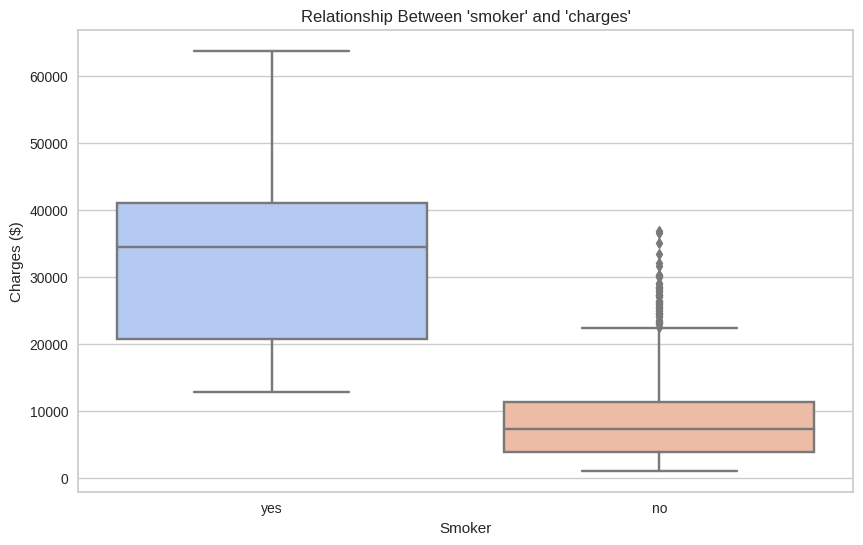

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df, palette='coolwarm')
plt.title("Relationship Between 'smoker' and 'charges'")
plt.xlabel('Smoker')
plt.ylabel('Charges ($)')
plt.show()

- The cost of health insurance for smokers is much higher than for non-smokers. This reflects the potential health risks of smoking and therefore higher health costs.

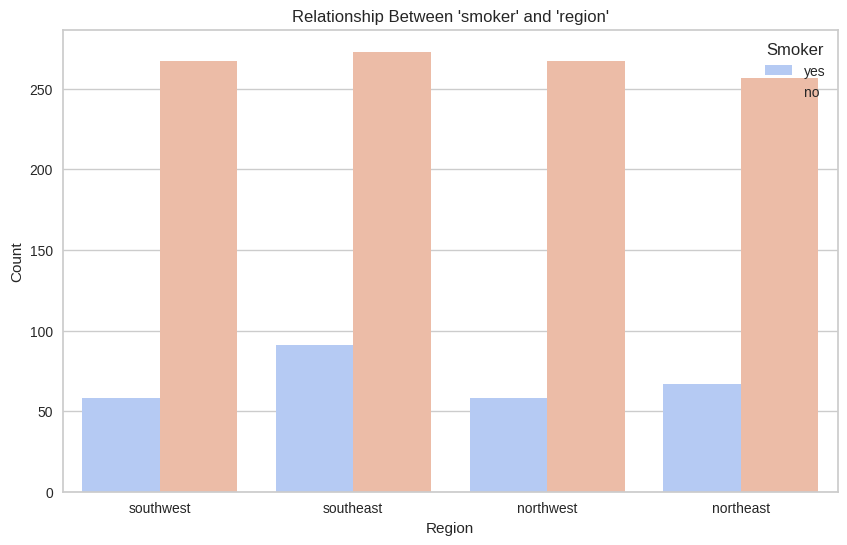

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='region', hue='smoker', data=df, palette='coolwarm')
plt.title("Relationship Between 'smoker' and 'region'")
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Smoker', loc='upper right')
plt.show()

- The number of smokers and non-smokers by region is similar. However, the number of smokers in the southeast region seems to be slightly higher than in other regions.

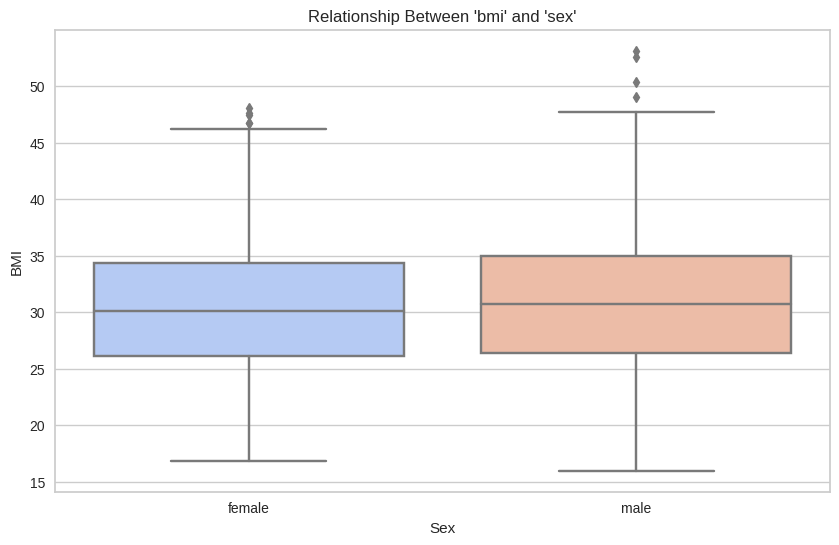

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='bmi', data=df, palette='coolwarm')
plt.title("Relationship Between 'bmi' and 'sex'")
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.show()

- There is no big difference between the Body Mass Index (BMI) distributions of men and women. The median values and overall distributions are similar for both genders.

In [10]:
region_children = df.groupby('region')['children'].sum().sort_values(ascending=False)
region_most_children = region_children.idxmax()
region_most_children_value = region_children.max()

region_most_children, region_most_children_value

('southeast', 382)

- The Southeast region is the region with the most children, with a total of 382 children.

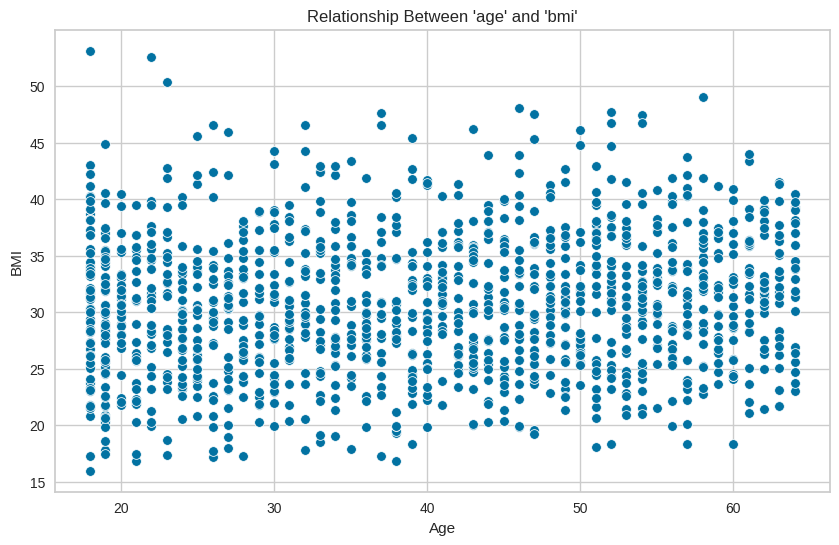

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi', data=df)
plt.title("Relationship Between 'age' and 'bmi'")
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

- There does not seem to be a significant relationship between age and Body Mass Index (BMI). BMI does not show a trend that increases or decreases significantly with increasing age.

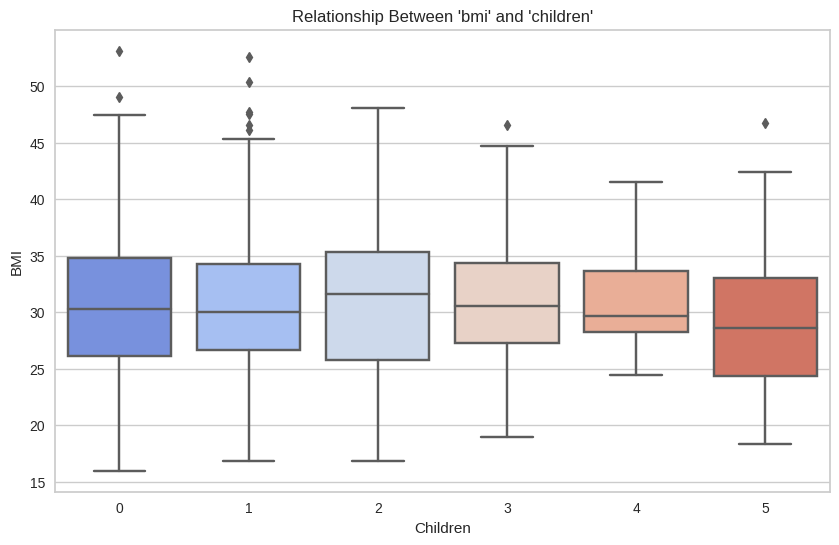

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='children', y='bmi', data=df, palette='coolwarm')
plt.title("Relationship Between 'bmi' and 'children'")
plt.xlabel('Children')
plt.ylabel('BMI')
plt.show()

- There is no significant difference in Body Mass Index (BMI) distribution among individuals with different number of children. The median values and overall distributions for each category are similar.

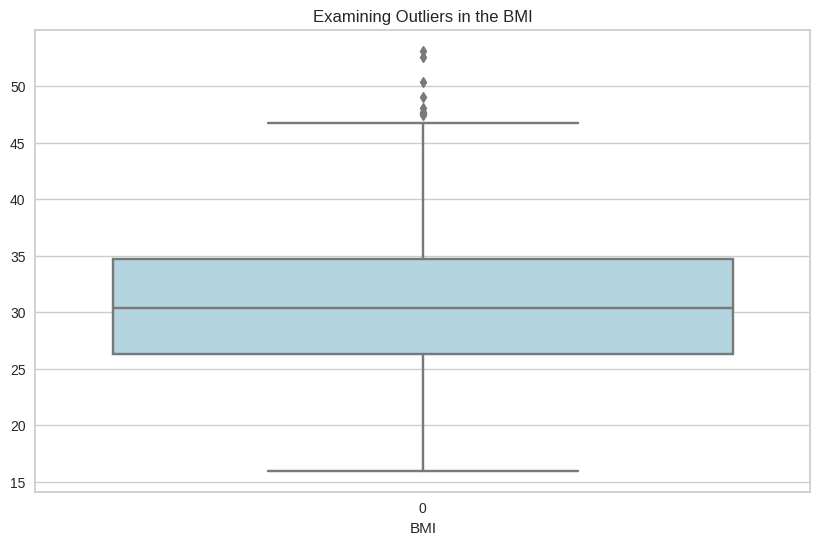

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['bmi'], color='lightblue')
plt.title('Examining Outliers in the BMI')
plt.xlabel('BMI')
plt.show()

- In the Body Mass Index (BMI) distribution, some values outside the upper limit of the box may be seen as outliers. These values represent individuals with higher BMI values than the general population.
- Outliers shown in the boxplot are based on the 1.5 iqr limit. According to the problem of interest, this iqr limit can be increased with the 'whis' parameter.

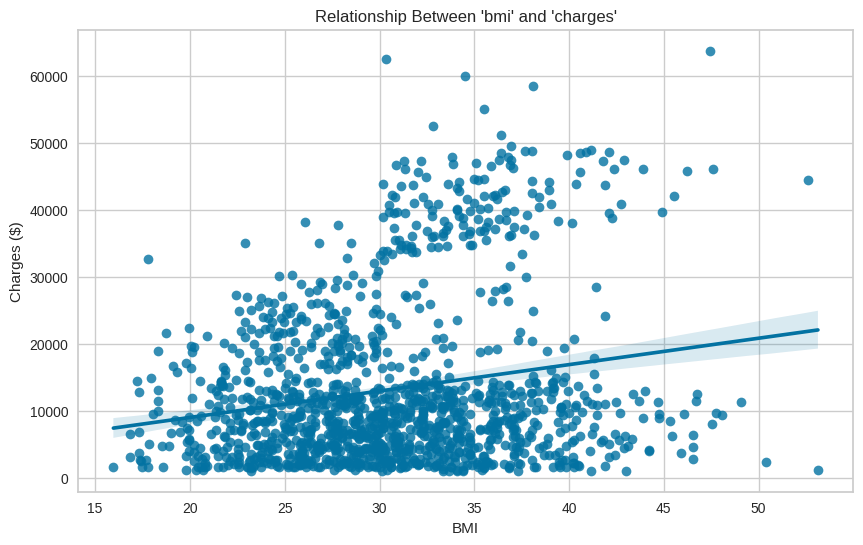

In [14]:
plt.figure(figsize=(10, 6))
sns.regplot(x='bmi', y='charges', data=df)
plt.title("Relationship Between 'bmi' and 'charges'")
plt.xlabel('BMI')
plt.ylabel('Charges ($)')
plt.show()

- There is a relationship between BMI and health insurance costs (charges). As the BMI value increases, the cost of health insurance generally increases. This may indicate that individuals with a high BMI may have higher health risks and therefore have higher insurance costs. However, it should be noted that this relationship is not exactly linear and other factors may also affect costs.

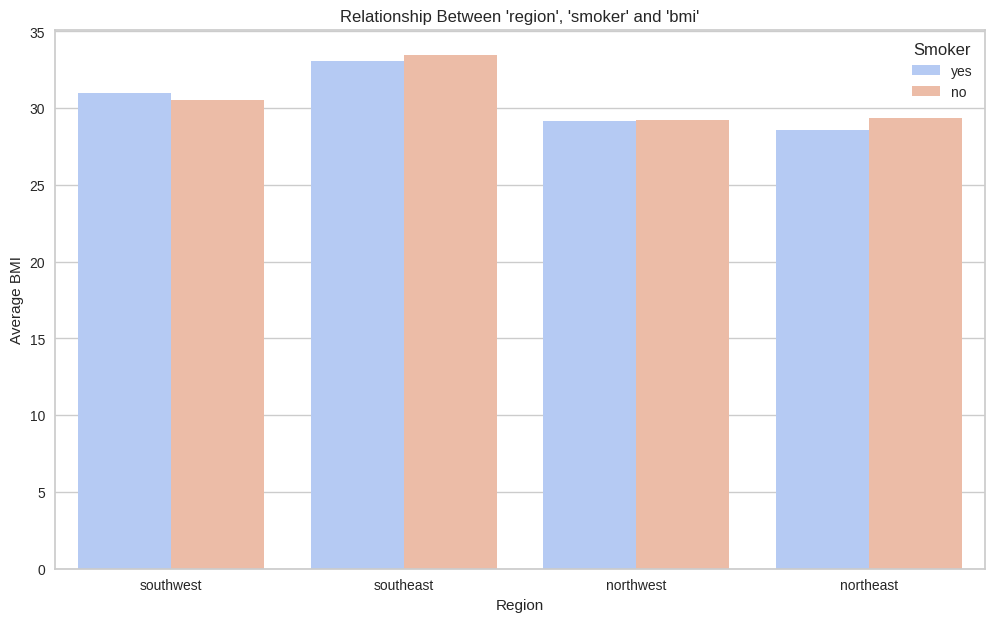

In [15]:
plt.figure(figsize=(12, 7))
sns.barplot(x='region', y='bmi', hue='smoker', data=df, palette='coolwarm', errorbar=None)
plt.title("Relationship Between 'region', 'smoker' and 'bmi'")
plt.xlabel('Region')
plt.ylabel('Average BMI')
plt.legend(title='Smoker')
plt.show()

- When we look at the average Body Mass Index (BMI) values by region, we can see that there is not a big difference between smokers and non-smokers. However, overall, individuals in the southeast region seem to have a slightly higher BMI.

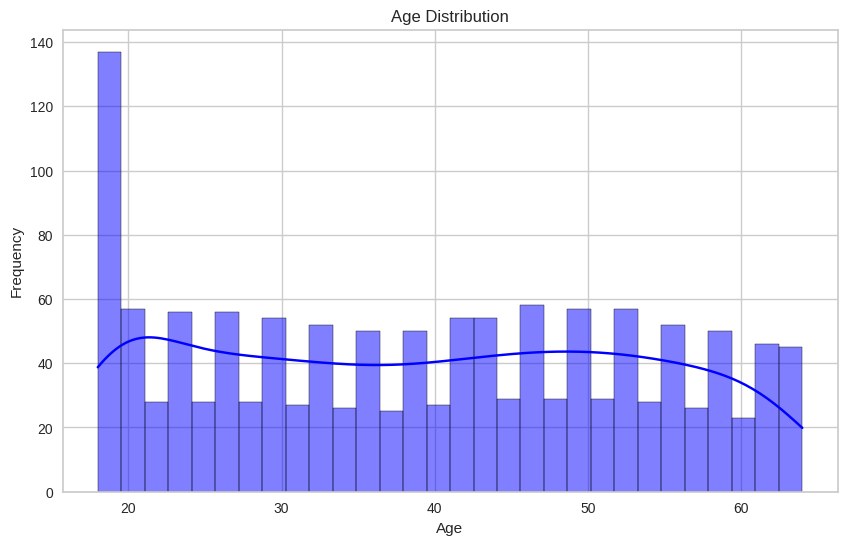

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- When we look at the age distribution, we can see that the younger age group (approximately 20 years old) is more intensely represented in the data set. Apart from this, the distribution to other age groups is relatively balanced.

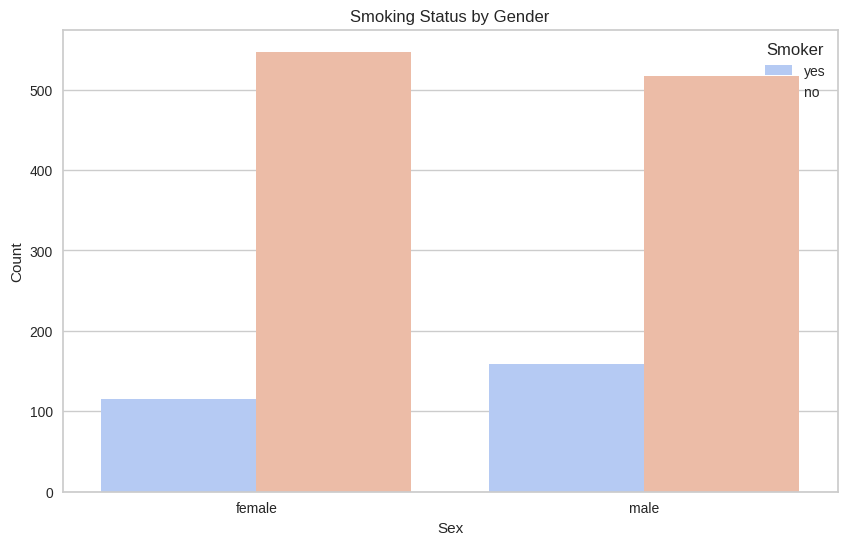

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='smoker', data=df, palette='coolwarm')
plt.title('Smoking Status by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Smoker', loc='upper right')
plt.show()

- As seen in the graph, the number of smokers among men is slightly higher than among women. However, the number of non-smokers in both sexes is higher than that of smokers.

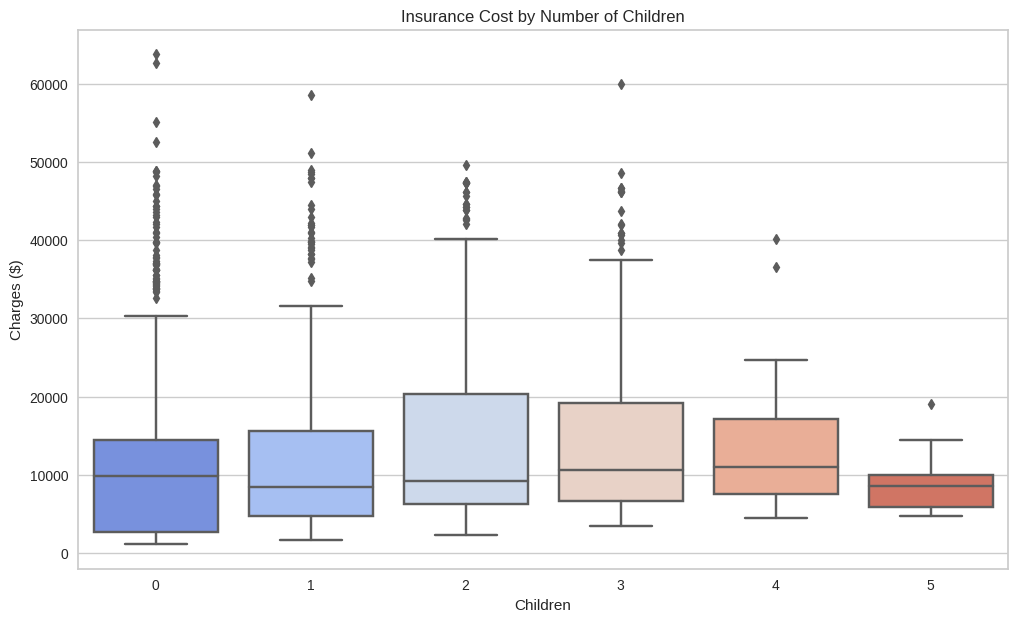

In [18]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='children', y='charges', data=df, palette='coolwarm')
plt.title('Insurance Cost by Number of Children')
plt.xlabel('Children')
plt.ylabel('Charges ($)')
plt.show()

- We can observe that insurance costs generally increase as the number of children increases. However, insurance costs for individuals with 5 children seem to be relatively lower. This may be due to the less representation of individuals with 5 children in the data set.

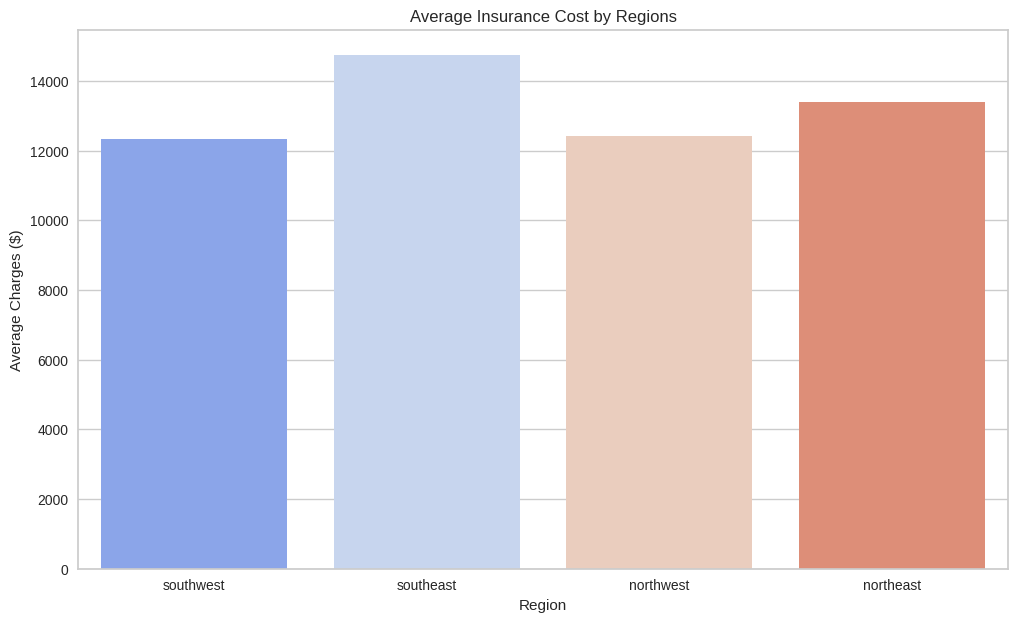

In [19]:
plt.figure(figsize=(12, 7))
sns.barplot(x='region', y='charges', data=df, palette='coolwarm', errorbar=None)
plt.title('Average Insurance Cost by Regions')
plt.xlabel('Region')
plt.ylabel('Average Charges ($)')
plt.show()

- The Southeast region has higher average insurance costs than other regions. This may be due to many factors such as lifestyle in this area, health habits or the cost of health care.

- Since exploratory data analysis has been performed on the dataset, a model can now be built.

## 4. Data Preprocessing

4.1) Handling Categorical Variables
- This dataset contains three categorical variables: 'sex', 'smoker', and 'region'. Both 'sex' and 'smoker' are binary categorical variables, so we can use Label Encoding for them. Since 'region' has multiple categories, it's more appropriate to use One-Hot Encoding.

In [20]:
df_new = df.copy()
label_encoder = LabelEncoder()
df_new['sex'] = label_encoder.fit_transform(df_new['sex'])
df_new['smoker'] = label_encoder.fit_transform(df_new['smoker'])

df_new = pd.get_dummies(df_new, columns=['region'], drop_first=True)
df_new

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


- For sex: 0 represents female and 1 represents male.
- For smoker: 0 represents non-smoker and 1 represents smoker.
- One-hot encoding was applied to region, resulting in three new columns (region_northwest, region_southeast, region_southwest).

4.2) Splitting the Dataset
- Next, we'll split the dataset into training and testing sets. The target variable is charges, while the rest are features.

In [21]:
X = df_new.drop('charges', axis=1)
y = df_new['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 8), (268, 8), (1070,), (268,))

- We have 1070 samples for training and 268 samples for testing.

4.3) Scaling the Dataset
- Now, let's normalize the data using Standard Scaling. In Standard Scaling, the mean of the data is 0 and the standard deviation is 1. This ensures that all features have the same scale, which is especially important for certain algorithms.

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]

array([[ 0.47222651, -1.0246016 , -1.75652513,  0.73433626, -0.50874702,
         1.78316783, -0.59966106, -0.5723141 ],
       [ 0.54331294, -1.0246016 , -1.03308239, -0.91119211, -0.50874702,
        -0.56079971, -0.59966106, -0.5723141 ],
       [ 0.8987451 , -1.0246016 , -0.94368672, -0.91119211, -0.50874702,
        -0.56079971,  1.66760869, -0.5723141 ],
       [-0.02537852, -1.0246016 ,  0.62239299,  3.20262882, -0.50874702,
        -0.56079971,  1.66760869, -0.5723141 ],
       [ 1.04091797, -1.0246016 , -1.50489287,  1.55710045, -0.50874702,
         1.78316783, -0.59966106, -0.5723141 ]])

- Each feature now has a mean of approximately zero and a standard deviation of approximately one.

## 5. Model Selection

For regression, we'll train multiple models to predict the health insurance charges. Specifically, we'll use:

- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boosting Regressor

In [23]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

cv_scores = {}

for model_name, model in models.items():
    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores[model_name] = np.mean(np.sqrt(-score))

cv_scores

{'Linear Regression': 6147.093944016903,
 'Decision Tree': 6599.486654898722,
 'Random Forest': 5003.943382417882,
 'Gradient Boosting': 4691.372822688306}

- Here are the root mean squared errors (RMSE) for the models based on 5-fold cross-validation:

- Linear Regression: 6147.09
- Decision Tree: 6599.48
- Random Forest: 5003.94
- Gradient Boosting: 4691.37

From the above results, the Gradient Boosting Regressor has the lowest RMSE and thus performs the best among the selected models for this dataset.

## 6. Hyper-parameter Optimization
- For the Gradient Boosting Regressor, we will perform hyper-parameter tuning using Grid Search.

- We'll search across multiple parameters to find the best combination:

In [24]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1],
    'max_features': ['sqrt', 'log2', None]
}

gb_reg = GradientBoostingRegressor()

cv_values = [5, 10, 15]
best_scores = []
best_param_sets = []

for cv_val in cv_values:
    grid_search = GridSearchCV(gb_reg, param_grid, cv=cv_val, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    best_scores.append(grid_search.best_score_)
    best_param_sets.append(grid_search.best_params_)

max_index = best_scores.index(max(best_scores))
best_cv = cv_values[max_index]
best_params_for_best_cv = best_param_sets[max_index]

print(f"Best CV: {best_cv}, Best Parameters: {best_params_for_best_cv}")

Best CV: 15, Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': None, 'n_estimators': 100, 'subsample': 0.8}


The best hyperparameters for the Gradient Boosting Regressor based on our grid search are:

- Learning Rate: 0.05
- Max Depth: 3
- Max Features: None
- Number of Estimators (trees): 100
- Subsample: 0.8

With these optimized parameters, let's evaluate the performance of the model on the test dataset.

## 7. Model Evaluation
- We'll assess the model using common regression metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and R2.

In [25]:
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, rmse, mae, r2

(18820294.71533781, 4338.236360012881, 2487.709591299944, 0.8787732786316835)

Here are the evaluation metrics for the optimized Gradient Boosting Regressor on the test set:

- Mean Squared Error (MSE): 18820294.71
- Root Mean Squared Error (RMSE): 4338.23
- Mean Absolute Error (MAE): 2487.70
- R2: 0.8787

These metrics provide a quantitative measure of the model's performance on unseen data. The RMSE value indicates, on average, how far off our predictions are from the actual values.

- In traditional machine learning processes, manually executing steps such as Data Preprocessing, Model Selection, Hyper-parameter Optimization, and Model Evaluation can be both time-consuming and intricate. Successfully completing these steps demands a profound depth of knowledge. However, with the advent of automated machine learning (AutoML) libraries, automating these procedures has become achievable.

- Among these libraries, PyCaret stands out prominently. PyCaret is a Python library designed to simplify the end-to-end machine learning process. It offers functionalities to automatically handle many repetitive and time-consuming tasks, such as data preprocessing, feature engineering, model selection, hyperparameter tuning, and model evaluation.

- After the manual steps, let's try to automate these processes using the PyCaret library and compare the results.

In [26]:
df_new2 = df.copy()

In [27]:
s = setup(data=df_new2, target='charges', train_size=0.8, normalize=True, session_id=42)
best_model = compare_models()

,Description,Value
0,Session id,42
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(1070, 10)"
6,Transformed test set shape,"(268, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2608.9018,21715820.0465,4624.4699,0.8444,0.4321,0.3026,0.3000
lightgbm,Light Gradient Boosting Machine,2943.9217,24207078.9629,4890.3703,0.8265,0.5424,0.3639,0.6860
rf,Random Forest Regressor,2822.1254,24770542.8944,4952.7998,0.8235,0.4630,0.3305,0.5010
et,Extra Trees Regressor,2768.2531,27165447.1879,5192.9926,0.8057,0.4720,0.3153,0.7050
ada,AdaBoost Regressor,4081.5216,27607733.2150,5245.4187,0.8051,0.6004,0.6672,0.1570
xgboost,Extreme Gradient Boosting,3206.0844,29314392.2000,5394.7427,0.7923,0.5521,0.4132,0.2440
knn,K Neighbors Regressor,3421.6868,30962113.8000,5536.7546,0.7790,0.4818,0.3615,0.1390
br,Bayesian Ridge,4247.2212,37885100.9089,6133.2051,0.7298,0.5912,0.4249,0.1320
llar,Lasso Least Angle Regression,4243.6630,37883958.8102,6132.9323,0.7298,0.5874,0.4240,0.1320
ridge,Ridge Regression,4245.0740,37884968.2805,6133.0782,0.7298,0.5869,0.4243,0.1340


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

- With PyCaret, we have completed the data preprocessing and model selection stages with 2 lines of code.
- When we examined the results, we saw that the model with the highest success was Gradient Boosting Regressor.
- Now let's tune our model with the tune_model function.

In [28]:
tuned_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2717.1587,23089570.9781,4805.1609,0.8344,0.5003,0.3085
1,2746.2514,24518783.5290,4951.6445,0.8284,0.4659,0.3264
2,2483.3418,13043667.0421,3611.6017,0.9136,0.4185,0.3643
3,2722.6343,17340104.6657,4164.1451,0.8981,0.3910,0.2726
4,2781.5785,24440079.1120,4943.6908,0.8463,0.5354,0.4204
5,2991.0078,23665153.8633,4864.6844,0.7637,0.4333,0.3142
6,2979.7479,30521114.2140,5524.5918,0.7756,0.4882,0.3047
7,3140.3041,29104815.6469,5394.8879,0.7862,0.4580,0.3757
8,2612.7584,23998029.5474,4898.7784,0.8465,0.4481,0.3119


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


- When running the tune_model function with all its default parameters, it performed a 10-fold cross-validation. Despite the tuning attempts, the original model outperformed the tuned one, so the original model will be returned as the better option.

- Let's evaluate our model with the evaluate_model function.

In [29]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

- When we evaluate the model with the evaluate_model function, we can see many details about the model. Let's examine a few of them;

- In the Pipeline Plot section, the pipeline of the model is presented visually.

- Hyperparameters section contains hyperparameters used in the model.
The values of some selected hyperparameters are as follows:

- learning_rate =	0.1
- max_depth =	3
- max_features = None
- n_estimators = 100
- subsample = 1

- Residuals Plot is located in the Residuals section.
- This plot shows the difference between the observed and predicted values. Residuals give an indication of the goodness of fit of the model. Ideally, residuals should be randomly scattered around zero.
- For this model, Train R2 score is 0.9 and Test R2 score is 0.88

- Prediction Error Plot is located in the Prediction Error section.
-  It displays actual vs. predicted values. A perfectly accurate model would result in all points lying on the line y = x.

- For more detailed reviews, the rest of the sections can also be examined.

Finally, let's observe metrics such as MAE, MSE, RMSE and R2 with the predict_model function.

In [31]:
predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2397.3830,18691301.5138,4323.3438,0.8796,0.3929,0.2843


,age,sex,bmi,children,smoker,region,charges,prediction_label
764,45,female,25.174999,2,no,northeast,9095.068359,10925.482144
887,36,female,30.020000,0,no,northwest,5272.175781,5706.412302
890,64,female,26.885000,0,yes,northwest,29330.982422,28037.933733
1293,46,male,25.745001,3,no,northwest,9301.893555,9626.887547
259,19,male,31.920000,0,yes,northwest,33750.292969,33868.648842
...,...,...,...,...,...,...,...,...
109,63,male,35.090000,0,yes,southeast,47055.531250,45165.986501
575,58,female,27.170000,0,no,northwest,12222.898438,12539.626228
535,38,male,28.025000,1,no,northeast,6067.126953,6794.252419
543,54,female,47.410000,0,yes,southeast,63770.429688,47986.067993


- The model developed manually and the one automatically constructed through PyCaret demonstrated similar performance in terms of their results.
- To further enhance the model's success, a series of advanced strategies can be employed.
- Feature engineering can be utilized to add new attributes to the dataset or to transform existing ones, ensuring the model generalizes better.